In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import viz_tools
from salishsea_tools import tidetools

In [2]:
#fT = NC.Dataset('../../myResults/blastFraser/15may15/SalishSea_1h_20150515_20150515_grid_T.nc','r')
fT = NC.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/15may15/SalishSea_1h_20150515_20150515_grid_T.nc','r')
eta = fT.variables['sossheig'][:]
sal = fT.variables['vosaline'][:]
temp = fT.variables['votemper'][:]
depth = fT.variables['deptht'][:]

In [3]:
m = sal == 0
sal_masked = np.ma.array(sal,mask=m)
print sal_masked[0,0,375,250:255].mask
mt = temp == 0
temp_masked = np.ma.array(temp,mask=mt)
me = eta == 0
eta_masked = np.ma.array(eta,mask=me)

[False False False False False]


In [4]:
print np.max(sal_masked[6]), np.max(sal_masked[7]),np.max(sal_masked[8]), np.max(sal_masked[9])

33.5108 33.5385 33.5443 33.5275


In [5]:
print (np.max(sal_masked[3])+np.max(sal_masked[4])+np.max(sal_masked[5]))/3.

33.4789733887


In [6]:
fU = NC.Dataset('../../myResults/blastFraser/14may15/SalishSea_1h_20150514_20150514_grid_U.nc','r')
uvel = fU.variables['vozocrtx'][:]
mu = uvel == 0
uvel_masked = np.ma.array(uvel,mask=mu)
print uvel.shape

(24, 40, 898, 398)


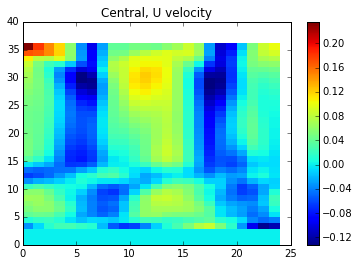

In [7]:
up = uvel[:,36:0:-1,424,267]
plt.pcolormesh(up.transpose())
plt.colorbar()
plt.title("Central, U velocity")

In [8]:
fV = NC.Dataset('../../myResults/blastFraser/14may15/SalishSea_1h_20150514_20150514_grid_V.nc','r')
vvel = fV.variables['vomecrty'][:]
mv = vvel == 0
vvel_masked = np.ma.array(vvel,mask=mv)

<matplotlib.colorbar.Colorbar instance at 0x7f42bdcadd88>

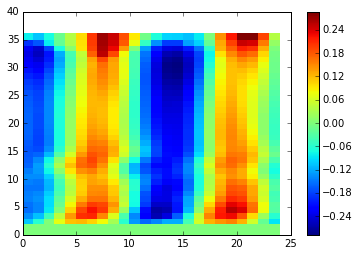

In [9]:
vp = vvel[:,36:0:-1,424,267]
plt.pcolormesh(vp.transpose())
plt.colorbar()

In [10]:
u_us, v_us = viz_tools.unstagger(uvel, vvel)

<matplotlib.colorbar.Colorbar instance at 0x7f42bdb11170>

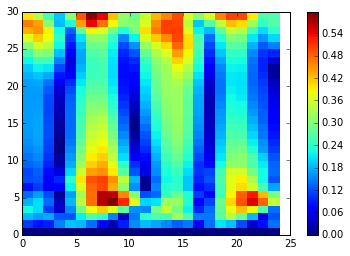

In [11]:
sp = np.sqrt(u_us[:,30:0:-1,416,282]*u_us[:,30:0:-1,416,282]+
             v_us[:,30:0:-1,416,282]*v_us[:,30:0:-1,416,282])
plt.pcolormesh(sp.transpose())
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f42bd9e3e60>

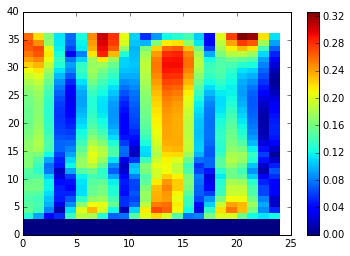

In [12]:
sp = np.sqrt(u_us[:,36:0:-1,424,267]*u_us[:,36:0:-1,424,267]+
             v_us[:,36:0:-1,424,267]*v_us[:,36:0:-1,424,267])
plt.pcolormesh(sp.transpose())
plt.colorbar()

76.5856 121.867 173.114 226.26 279.935


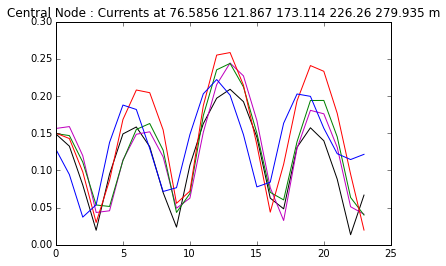

In [13]:
spn = np.sqrt(u_us[:,:,424,267]*u_us[:,:,424,267]+
             v_us[:,:,424,267]*v_us[:,:,424,267])
print depth[25],depth[27],depth[29],depth[31],depth[33]
plt.plot(spn[:,25],'k',spn[:,27],'m',spn[:,29],'g',spn[:,31],'r',spn[:,33],'b')
plt.title("Central Node : Currents at 76.5856 121.867 173.114 226.26 279.935 m")


76.5856 121.867 173.114 226.26 279.935


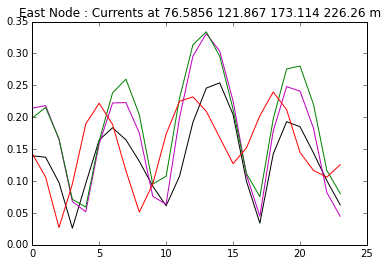

In [14]:
spn = np.sqrt(u_us[:,:,416,272]*u_us[:,:,416,272]+
             v_us[:,:,416,272]*v_us[:,:,416,272])
print depth[25],depth[27],depth[29],depth[31],depth[33]
plt.plot(spn[:,25],'k',spn[:,27],'m',spn[:,29],'g',spn[:,31],'r',spn[:,33],
         'b')
plt.title("East Node : Currents at 76.5856 121.867 173.114 226.26 m")


In [15]:
fW = NC.Dataset('../../myResults/blastFraser/13may15/SalishSea_1h_20150513_20150513_grid_W.nc','r')
wvel = fW.variables['vovecrtz'][:]
mw = wvel == 0
wvel_masked = np.ma.array(wvel,mask=mw)

160.101974487


<matplotlib.colorbar.Colorbar instance at 0x7f42bd387680>

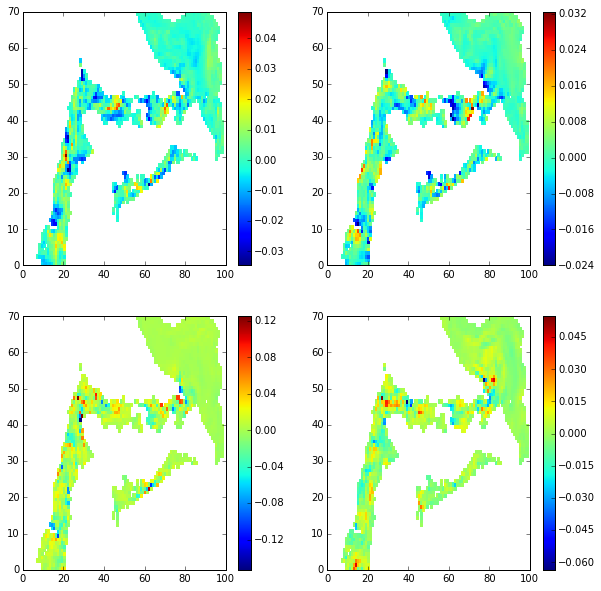

In [16]:
level = 28
print 0.5*(depth[28]+depth[29])
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.pcolormesh(wvel_masked[15,level,300:370,220:320])
plt.colorbar()
plt.subplot(2,2,2)
plt.pcolormesh(wvel_masked[2,level,300:370,220:320])
plt.colorbar()
plt.subplot(2,2,3)
plt.pcolormesh(wvel_masked[4,level,300:370,220:320])
plt.colorbar()
plt.subplot(2,2,4)
plt.pcolormesh(wvel_masked[21,level,300:370,220:320])
plt.colorbar()

In [17]:
alpha = np.zeros(39)
for level in np.arange(1,39):
    print level,depth[level],np.max(wvel_masked[:,level]), np.min(wvel_masked[:,level]),(depth[level+1]-depth[level-1])/2./np.max(wvel_masked[:,level]),(depth[level+1]-depth[level-1])/2./np.min(wvel_masked[:,level])
    alpha[level] = np.maximum(-(depth[level]-depth[level-1])/np.min(wvel_masked[:,level]),(depth[level]-depth[level-1])/np.max(wvel_masked[:,level]))

1 1.5 0.00513572 -0.0038452 194.715715843 -260.065878241
2 2.50001 0.0102474 -0.00768803 97.5870044985 -130.074043206
3 3.50003 0.0152913 -0.0115256 65.3984787567 -86.7660755525
4 4.50007 0.0202206 -0.0153541 49.4576017101 -65.1332048065
5 5.50015 0.0250039 -0.0191689 39.9985262082 -52.1740896735
6 6.50031 0.0296324 -0.0229652 33.7548342844 -43.5545000056
7 7.50062 0.0340979 -0.0267381 29.3408921691 -37.4171257257
8 8.50124 0.0383954 -0.0304834 26.068343571 -32.8344749947
9 9.50243 0.0425219 -0.0341969 23.5587974297 -29.2940084415
10 10.5048 0.0464766 -0.0378753 21.5902077971 -26.4932310437
11 11.5093 0.0502632 -0.0415161 20.0285605908 -24.2484609734
12 12.5182 0.0538859 -0.0451187 18.7998973515 -22.4529994655
13 13.5354 0.0578046 -0.0486875 17.7392202113 -21.0610173577
14 14.569 0.0622398 -0.0522361 16.8611935564 -20.0902957436
15 15.6343 0.0667457 -0.0557928 16.4219729034 -19.6458084643
16 16.7612 0.0714078 -0.0595042 16.6147743152 -19.9384880909
17 18.0071 0.0763917 -0.0637215 17.80

18.9379138947


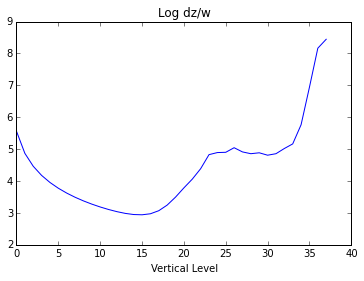

In [18]:
plt.plot(np.log(alpha[1:39]))
plt.title("Log dz/w")
plt.xlabel("Vertical Level")
print np.min(alpha[1:39])

In [19]:
u, v = viz_tools.unstagger(uvel_masked, vvel_masked)

<matplotlib.colorbar.Colorbar instance at 0x7f42bc130098>

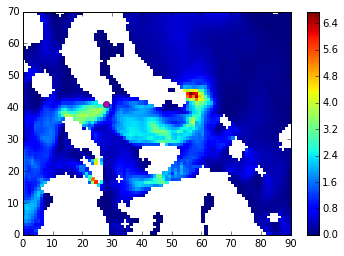

In [20]:
bot = 305
left = 235
t=12
plt.pcolormesh(u[t,10,bot:375,left:325]**2+v[t,10,bot:375,left:325]**2)
plt.plot(264-left-1,347-bot-1,'om')
#plt.plot(291-left,319-bot,'*w')
#plt.plot(236-left,372-bot,'*w')
#plt.plot(291-left,372-bot,'*w')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f42bbf96ea8>

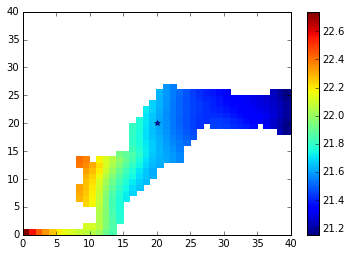

In [21]:
plt.pcolormesh(sal_masked[9,0,802:842,181:221])
plt.plot(822-802,201-181,'*')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f4277b2f518>

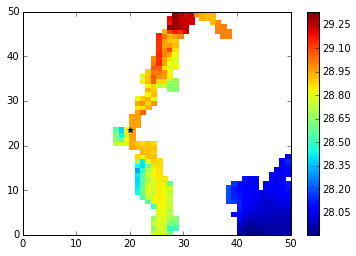

In [26]:
istart = 750.; jstart = 100
plt.pcolormesh(sal_masked[9,14,istart:800,jstart:150])
plt.plot(120-1-jstart+1,774-1-istart+0.5,'*')
plt.colorbar()

0.5


<matplotlib.colorbar.Colorbar instance at 0x7fe53bf12638>

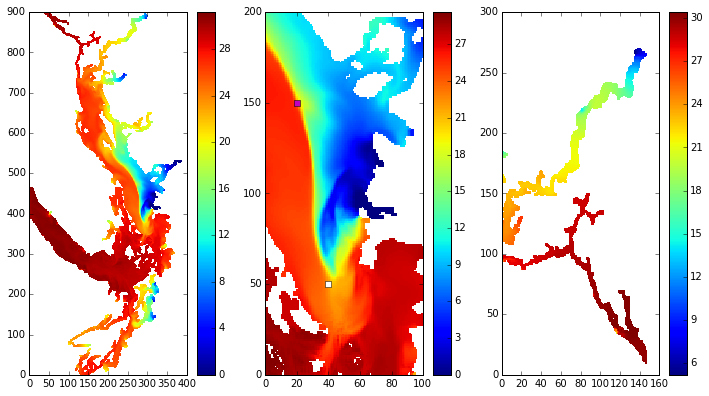

In [23]:
t=4
level=0
print depth[level]
plt.figure(figsize=(12,6.5))
plt.subplot(1,3,1)
plt.pcolormesh(sal_masked[t,level])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(sal_masked[t,level,325:525,250:350])
plt.plot(270-250,475-325,'sm',290-250,375-325,'sw')
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(sal_masked[t,level,750:,30:330].transpose())
plt.colorbar()

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.pcolormesh(eta_masked[t])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(eta_masked[t,320:360,275:305])
plt.colorbar()
print eta_masked[0,400,15]

In [25]:
print np.max(vvel_masked)

6.28059


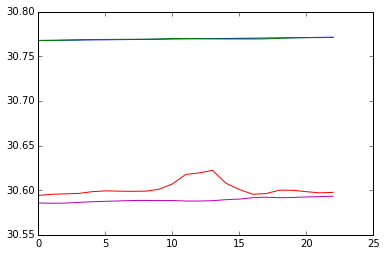

In [26]:
l2 = 1
plt.plot(sal_masked[0:23,0,465,3],'b',sal_masked[0:23,0,465,5],'g',sal_masked[0:23,l2,435,3],'m',
         sal_masked[0:23,l2,435,5],'r')

[33.01665496826172 33.19300079345703 33.32294845581055 33.417171478271484
 33.46661376953125 33.46664810180664 33.46664810180664 33.46664810180664 --
 -- -- -- -- -- --]


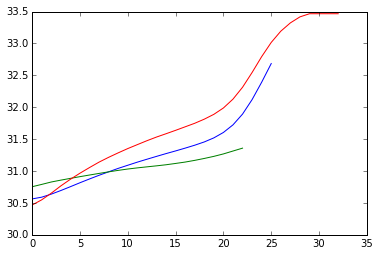

In [27]:
plt.plot(sal_masked[23,0:34,435,2],'b',sal_masked[23,0:34,435,15],'g',sal_masked[23,:,410,1],'r')
print sal_masked[23,25:40,410,1]

In [ ]:
d=28
time = 23
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.plot(sal_masked[0,0:d,395,1],-depth[0:d],'-*',sal_masked[time,0:d,395,1],-depth[0:d],'o-')
plt.subplot(1,2,2)
plt.plot(sal_masked[0,0:d,465,3],-depth[0:d],'-*',sal_masked[time,0:d,465,3],-depth[0:d],'o-')

<matplotlib.colorbar.Colorbar instance at 0x7fe53a2e36c8>

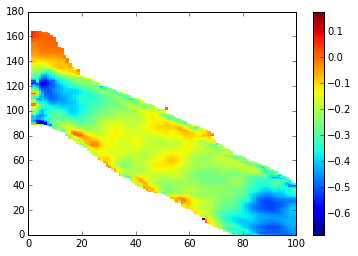

In [29]:
plt.pcolormesh(uvel_masked[23,15,300:475,:100])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fe53a143050>

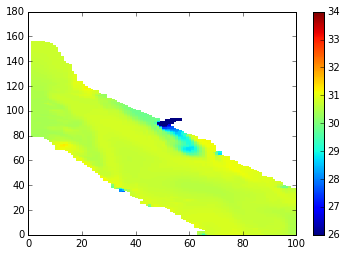

In [30]:
plt.pcolormesh(sal_masked[23,0,310:485,:100],vmax=34,vmin=26)
plt.colorbar()

In [ ]:
level = 27
time = 23
plt.figure(figsize=(9,5))
plt.pcolormesh(sal_masked[time,level,230:480,:350]-sal_masked[0,level,500,250],
               cmap=plt.cm.bwr,vmax=3,vmin=-3)
plt.colorbar()
print sal_masked[0,level,500,250], depth[level], np.max(sal_masked[time,level,230:480,:350])

<matplotlib.colorbar.Colorbar instance at 0x7fe53a161128>

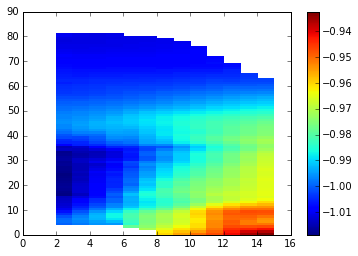

In [32]:
plt.pcolormesh(eta_masked[23,385:466,:15])
plt.colorbar()

0.852511198384


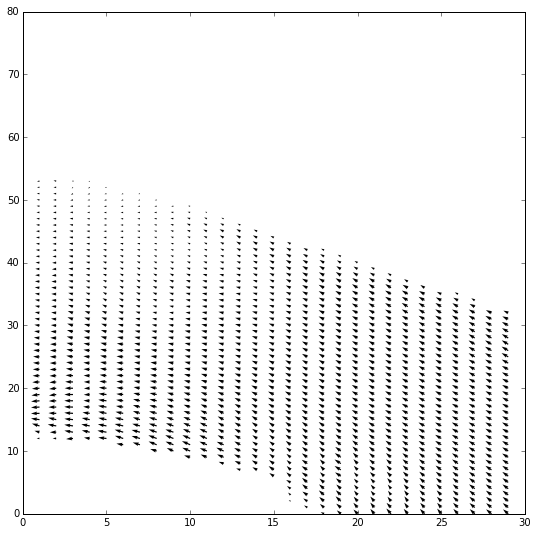

In [33]:
plt.figure(figsize=(9,9))
time = 12
level = 25
jmax = 30
imin = 380
imax = 455
plt.quiver(0.5*uvel_masked[time,level,imin:imax,:jmax]+0.5*uvel_masked[time,level,imin+1:imax+1,:jmax],
           0.5*vvel_masked[time,level,imin:imax,:jmax]+0.5*vvel_masked[time,level,imin+1:imax+1,1:jmax+1])
print np.sqrt(uvel_masked[time,level,398,5]**2+vvel_masked[time,level,398,5]**2)

In [ ]:
plt.figure(figsize=(9*3/6.,9))
level = 0
jmin = 115
jmax = 145
imin = 585
imax = 645
time = 12
plt.quiver(u[time,level,imin:imax-1,jmin:jmax-1],
           v[time,level,imin:imax-1,jmin:jmax-1],color='b')
lmin=3; lmax=10;
tempPlot = temp[time,level,:,:]
land=tempPlot
mu =land != 0
land= np.ma.array(land,mask=mu)
pylab.pcolor(np.arange(1,jmax-jmin)-0.5,np.arange(1,imax-imin)-0.5,
             land[imin+1:imax,jmin+1:jmax],vmin=lmin,vmax=lmax,cmap='hot')

<matplotlib.colorbar.Colorbar instance at 0x7fe53b083098>

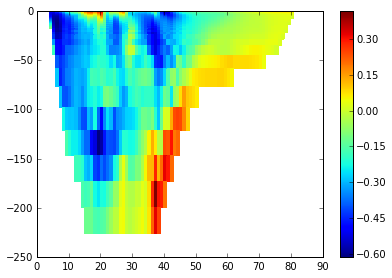

In [35]:
plt.figure(figsize=(6.4,4.4))
plt.pcolormesh(np.arange(0,85),-depth[:32],uvel_masked[23,:32,385:470,3])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fe53af503f8>

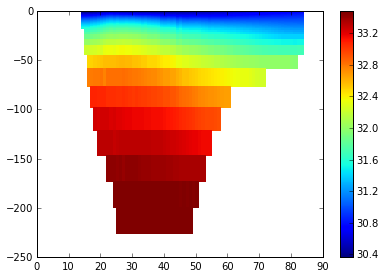

In [36]:
plt.figure(figsize=(6.4,4.4))
plt.pcolormesh(np.arange(0,85),-depth[:32],sal_masked[23,:32,375:460,3])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fe53ada4908>

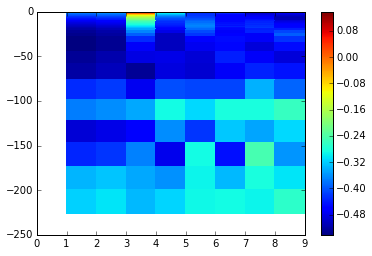

In [37]:
plt.pcolormesh(np.arange(0,10),-depth[:32],uvel_masked[14,:32,405,:10])
plt.colorbar()

In [38]:
t1=23
d=35
T_lat = fT.variables['nav_lat']
T_lon = fT.variables['nav_lon']
smin=28; smax=34

lines = np.loadtxt('../../tools/analysis_tools/thalweg.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);

vs=np.arange(smax,smin,-0.5);

salT=sal_masked[t1,:,lines[:,0],lines[:,1]];
XX,ZZ = np.meshgrid(ds,-depth[:d])
print salT.shape, XX.shape, ZZ.shape
ssalT = salT.transpose()
print ssalT.shape

plt.figure(figsize=(17,6))
pylab.pcolormesh(XX,ZZ,ssalT[:d],vmin=smin,vmax=smax,cmap='rainbow')
pylab.colorbar()
CS=pylab.contour(XX,ZZ,ssalT[:d],vs, colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
pylab.title('Salinity')

IOError: [Errno 2] No such file or directory: '../../tools/analysis_tools/thalweg.txt'

In [ ]:
data = np.genfromtxt('../BIG/SG0318001.cnv', skiprows=98)
pressure = data[:,1]
saldata = data[:,8]
plt.plot(sal_masked[23,:15,427,283],-depth[:15],'b-',saldata[:15],-pressure[:15],'*r')
plt.title("S2-3, Model on Oct 2, 2002 versus Data(points) on Sep 10, 2003")
plt.xlabel("Practical Salinity")
plt.ylabel("z (m)")

In [ ]:
plt.pcolormesh(np.arange(0,424-404),-depth[:34],sal_masked[2,:34,404:424,3]-sal_masked[0,:34,404:424,3])
plt.plot(412-404,-50,'*r')
plt.colorbar()


In [ ]:
plt.plot(range(400,420),eta_masked[2,400:420,3]-0.85,'b-+',
         np.arange(400,420)+0.5,vvel_masked[2,5,400:420,3],'g-o')

$\eta$ is driving v, not vice versa

In [ ]:
plt.plot(range(400,420),eta_masked[2,400:420,3],'b-+',
         np.arange(400,420),uvel_masked[2,5,400:420,2],'k-s', 
         np.arange(400,420),uvel_masked[2,5,400:420,3],'m-s')
plt.grid()

$\eta$ driving u, not vice versa

In [ ]:
j=775
plt.figure(figsize=(12,4.4))
plt.subplot(1,2,1)
plt.pcolormesh(np.arange(0,10),-depth[:32],sal_masked[9,:32,j,115:125])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(np.arange(0,20),-depth[:32],sal_masked[9,:32,j,175:195])
plt.colorbar()

In [ ]:
plt.pcolormesh(sal_masked[t,level,750:790,110:150])
plt.colorbar()

In [ ]:
t=20
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
imin = 390; imax = 435; jmin = 285; jmax = 398
mesh = ax.pcolormesh(uvel_masked[t,0,imin:imax,jmin:jmax])
fig.colorbar(mesh)

In [ ]:
time = 15
plt.figure(figsize=(15,15))
plt.quiver(u_us[time,level,imin:imax,jmin:jmax],
           v_us[time,level,imin:imax,jmin:jmax],color='b')
lmin=3; lmax=10;
tempPlot = temp[time,level,:,:]
land=tempPlot
mu =land != 0
land= np.ma.array(land,mask=mu)
pylab.pcolor(np.arange(0,jmax-jmin+2)-2,np.arange(0,imax-imin+2)-1.5,
             land[imin:imax+2,jmin:jmax+2],vmin=lmin,vmax=lmax,cmap='hot')

In [5]:
grid = NC.Dataset(
        '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_meter_SalishSea2.nc',
        'r')
bathy = grid.variables['Bathymetry'][:, :]
X = grid.variables['nav_lon'][:, :]
Y = grid.variables['nav_lat'][:, :]

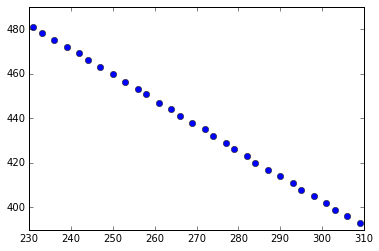

In [8]:
slats = np.linspace(49, 49.2, num=30, endpoint=True)
slons = np.linspace(-123.1,-123.8, num=30, endpoint=True)
ylat = np.zeros((30), dtype=np.int64)
xlon = np.zeros((30), dtype=np.int64)
for i, lat in enumerate(slats):
        lon = slons[i]
        ylat[i], xlon[i] = tidetools.find_closest_model_point(lon, lat, X, Y, bathy, lat_tol=0.003)
plt.plot(xlon,ylat,'o')

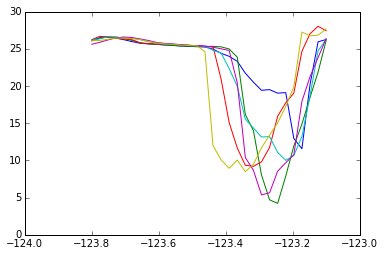

In [23]:
plt.xlim((-124,-123))
for j in range(0,24,4):
    plt.plot(slons, sal_masked[j, 0, ylat, xlon]);


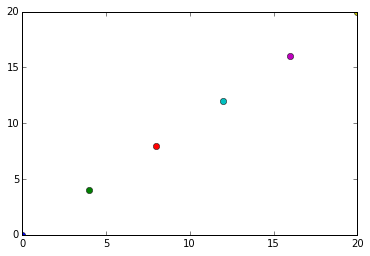

In [12]:
for j in range(0,24,4):
    plt.plot(j,j,'o');

(-124, -123)

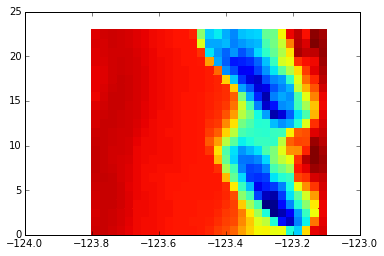

In [24]:
plt.pcolormesh(slons,np.arange(0,24),sal_masked[:,0, ylat, xlon])
plt.xlim((-124,-123))